In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import  Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib
from sklearn.decomposition import  PCA
from sklearn.cluster import  KMeans
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('C:/Users/ysabe/Documents/manufacturer.csv', encoding='latin-1')
print(data)

                                               name platform  year_of_release  \
0                                     Tetris Worlds      GBA             2001   
1                            Personal Trainer: Math       DS             2007   
2                                      Game Party 3     Weii             2009   
3                                Puzzler Collection       DS             2008   
4                                     TouchMaster 2       DS             2008   
..                                              ...      ...              ...   
816  Sorcery Saga: The Curse of the Great Curry God      PSV             2013   
817                     The Awakened Fate Ultimatum      PS3             2014   
818                     Battle Princess of Arcadias      PS3             2013   
819         Marrison vs. Donkey Kong: Tipping Stars    WeiiU             2015   
820             Hoshigami: Ruining Blue Earth Remix       DS             2007   

            genre          

In [3]:
df1 = pd.get_dummies(data.rating)
df2 = pd.get_dummies(data.Manufacturer)

In [11]:
df = pd.concat([data,df1,df2], axis = 1)
df

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,critic_score,...,CountPublisher,E,E10+,M,T,Microsoft,Nintendo,PC,Sega,Sony
0,Tetris Worlds,GBA,2001,Puzzle,THQ,1250000,390000,0,60000,6.5,...,21,1,0,0,0,0,1,0,0,0
1,Personal Trainer: Math,DS,2007,Puzzle,Ninti,480000,1120000,0,80000,6.3,...,81,1,0,0,0,0,1,0,0,0
2,Game Party 3,Weii,2009,Puzzle,Warner Bros. Interactive Entertainment,1400000,160000,0,120000,3.7,...,7,1,0,0,0,0,1,0,0,0
3,Puzzler Collection,DS,2008,Puzzle,Ubisoft,160000,780000,0,40000,7.1,...,50,1,0,0,0,0,1,0,0,0
4,TouchMaster 2,DS,2008,Puzzle,Midway Games,300000,490000,0,100000,7.6,...,7,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,Sorcery Saga: The Curse of the Great Curry God,PSV,2013,Role-Playing,Rising Star Games,0,0,30000,0,6.5,...,34,0,0,0,1,0,0,0,0,1
817,The Awakened Fate Ultimatum,PS3,2014,Role-Playing,Nippon Ichi Software,0,0,20000,0,6.5,...,46,0,0,0,1,0,0,0,0,1
818,Battle Princess of Arcadias,PS3,2013,Role-Playing,Nippon Ichi Software,0,0,20000,0,6.9,...,46,0,0,0,1,0,0,0,0,1
819,Marrison vs. Donkey Kong: Tipping Stars,WeiiU,2015,Puzzle,Ninti,0,0,10000,0,7.0,...,81,1,0,0,0,0,1,0,0,0


In [12]:
df = df.drop(columns = ['name','platform','genre','publisher','critic_count','user_count','developer', 'rating', 'Manufacturer','year_of_release'])

In [15]:
jp = df.drop(columns = ['eu_sales', 'na_sales','other_sales'])
jp = jp[jp['jp_sales'] > 0]
jp

,jp_sales,critic_score,user_score,CountDeveloper,CountPublisher,E,E10+,M,T,Microsoft,Nintendo,PC,Sega,Sony
407,100000,9.6,8.4,9,16,0,0,1,0,1,0,0,0,0
408,2730000,9.2,8.7,5,23,0,0,0,1,0,0,0,0,1
409,240000,8.7,6.5,9,16,0,0,1,0,0,0,0,0,1
410,250000,9.2,6.4,9,16,0,0,1,0,0,0,0,0,1
411,1490000,8.5,8.8,5,23,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,30000,6.5,7.3,1,34,0,0,0,1,0,0,0,0,1
817,20000,6.5,7.3,18,46,0,0,0,1,0,0,0,0,1
818,20000,6.9,7.9,1,46,0,0,0,1,0,0,0,0,1
819,10000,7.0,7.4,3,81,1,0,0,0,0,1,0,0,0


In [16]:
na = df.drop(columns = ['eu_sales', 'jp_sales','other_sales'])
na = na[na['na_sales'] > 0]
na

,na_sales,critic_score,user_score,CountDeveloper,CountPublisher,E,E10+,M,T,Microsoft,Nintendo,PC,Sega,Sony
0,1250000,6.50,6.3,1,21,1,0,0,0,0,1,0,0,0
1,480000,6.30,6.3,6,81,1,0,0,0,0,1,0,0,0
2,1400000,3.70,6.3,1,7,1,0,0,0,0,1,0,0,0
3,160000,7.10,6.3,1,50,1,0,0,0,0,1,0,0,0
4,300000,7.60,6.3,2,7,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,60000,6.50,7.3,18,46,0,0,0,1,0,1,0,0,0
803,60000,7.50,7.7,7,17,0,0,0,1,0,1,0,0,0
804,30000,7.80,8.1,3,46,0,0,0,1,0,0,0,0,1
806,20000,5.60,6.0,3,23,0,1,0,0,0,1,0,0,0


In [17]:
eu = df.drop(columns = ['jp_sales', 'na_sales','other_sales'])
eu = eu[eu['eu_sales'] > 0]
eu


,eu_sales,critic_score,user_score,CountDeveloper,CountPublisher,E,E10+,M,T,Microsoft,Nintendo,PC,Sega,Sony
0,390000,6.50,6.3,1,21,1,0,0,0,0,1,0,0,0
1,1120000,6.30,6.3,6,81,1,0,0,0,0,1,0,0,0
2,160000,3.70,6.3,1,7,1,0,0,0,0,1,0,0,0
3,780000,7.10,6.3,1,50,1,0,0,0,0,1,0,0,0
4,490000,7.60,6.3,2,7,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,60000,6.40,5.6,31,89,0,1,0,0,0,1,0,0,0
728,50000,8.70,7.1,31,89,0,0,0,1,0,0,0,0,1
729,60000,7.70,8.6,31,89,0,1,0,0,0,0,0,0,1
730,10000,8.20,7.5,18,89,0,0,0,1,0,1,0,0,0


In [18]:
xjp=jp.drop('jp_sales',axis=1).values
yjp=jp['jp_sales'].values
xna=na.drop('na_sales',axis=1).values
yna=na['na_sales'].values
xeu=eu.drop('eu_sales',axis=1).values
yeu=eu['eu_sales'].values

In [19]:

xjp_train, xjp_test, yjp_train, yjp_test = train_test_split(xjp, yjp, test_size=0.3, random_state=0)

print("number of training samples:",xjp_train.shape[0])
print("number of test samples:", xjp_test.shape[0])

number of training samples: 289
number of test samples: 125


In [20]:

xna_train, xna_test, yna_train, yna_test = train_test_split(xna, yna, test_size=0.3, random_state=0)

print("number of training samples:",xna_train.shape[0])
print("number of test samples:", xna_test.shape[0])

number of training samples: 520
number of test samples: 224


In [21]:

xeu_train, xeu_test, yeu_train, yeu_test = train_test_split(xeu, yeu, test_size=0.3, random_state=0)

print("number of training samples:",xeu_train.shape[0])
print("number of test samples:", xeu_test.shape[0])

number of training samples: 422
number of test samples: 182


In [22]:

from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
xjp_train=ms.fit_transform(xjp_train)
xjp_test=ms.transform(xjp_test)


from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
xna_train=ms.fit_transform(xna_train)
xna_test=ms.transform(xna_test)



from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
xeu_train=ms.fit_transform(xeu_train)
xeu_test=ms.transform(xeu_test)

In [27]:
def variance(x):
    total=0
    hlist=[]
    for i in np.arange(0,x.shape[1]):
        p=PCA(n_components=i+1)
        p.fit(x)
        total=total+p.explained_variance_ratio_[i]
        hlist.append(total)
        
    return hlist
xjptrainvariance=list(map(lambda x:x*100,variance(xjp_train)))
xnatrainvariance=list(map(lambda x:x*100,variance(xna_train)))
xeutrainvariance=list(map(lambda x:x*100,variance(xeu_train)))

Text(0.5, 1.0, 'comulative variance ratio of p.c.a components')

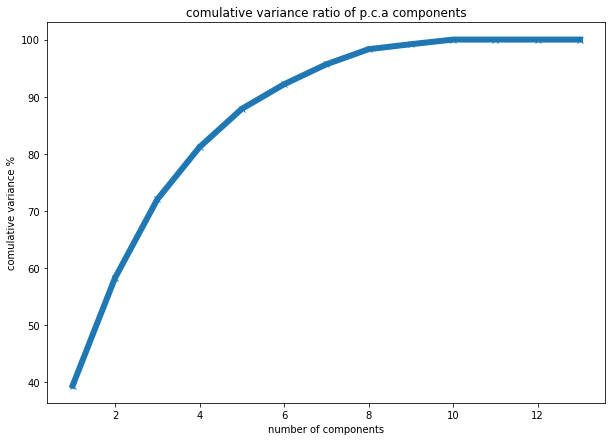

In [28]:

plt.figure(figsize=(10,7))
plt.plot(np.arange(1,xjp_train.shape[1]+1),xjptrainvariance,marker='x',markerfacecolor='red',lw=6)
plt.xlabel('number of components')
plt.ylabel('comulative variance %')
plt.title('comulative variance ratio of p.c.a components')

Text(0.5, 1.0, 'comulative variance ratio of p.c.a components')

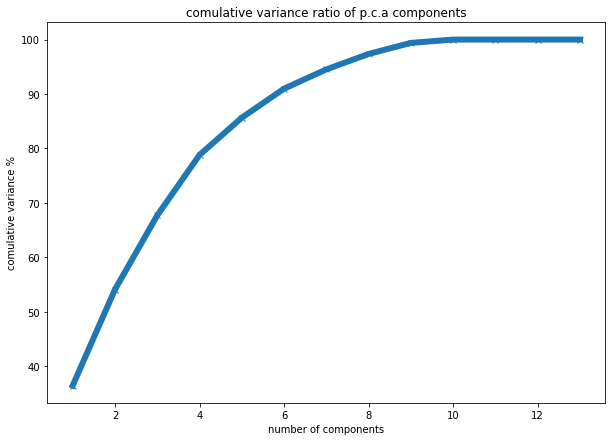

In [29]:

plt.figure(figsize=(10,7))
plt.plot(np.arange(1,xna_train.shape[1]+1),xnatrainvariance,marker='x',markerfacecolor='red',lw=6)
plt.xlabel('number of components')
plt.ylabel('comulative variance %')
plt.title('comulative variance ratio of p.c.a components')

Text(0.5, 1.0, 'comulative variance ratio of p.c.a components')

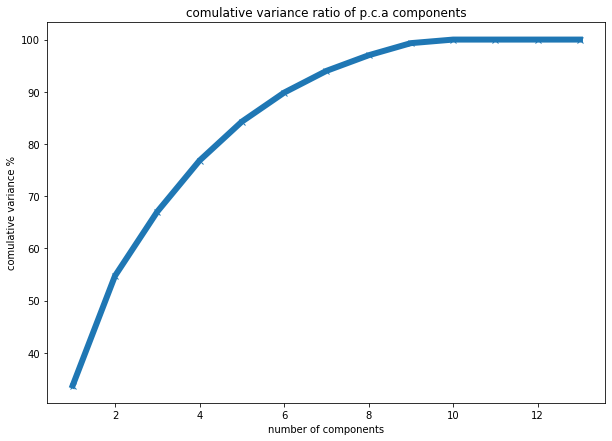

In [30]:

plt.figure(figsize=(10,7))
plt.plot(np.arange(1,xeu_train.shape[1]+1),xeutrainvariance,marker='x',markerfacecolor='red',lw=6)
plt.xlabel('number of components')
plt.ylabel('comulative variance %')
plt.title('comulative variance ratio of p.c.a components')

Typically, we want the explained variance to be between 95–99%

In [31]:
pca=PCA(n_components=8)
pca.fit(xjp_train)
ptrainjp=pca.fit_transform(xjp_train)

In [32]:
pca=PCA(n_components=8)
pca.fit(xna_train)
ptrainna=pca.fit_transform(xna_train)

In [33]:
pca=PCA(n_components=8)
pca.fit(xeu_train)
ptraineu=pca.fit_transform(xeu_train)

In [34]:
lm = LinearRegression()
lm.fit(xjp_train,yjp_train)
print(lm.coef_)

[433448.5441795  277592.26633435  90644.71092453 409950.29951947
  39742.53621806  37352.32155067 -51015.36720955 -26079.49055917
 -62343.83095726  76663.1148874       0.         -73767.96657171
  59448.68264156]


In [35]:
lm = LinearRegression()
lm.fit(xna_train,yna_train)
print(lm.coef_)

[1341576.17613497 -281526.91651659  -26765.33993708  105328.05366823
   26701.83826547  -64697.43291746  148192.17200224 -110196.57735026
  298958.84187823  -59321.47588108 -197599.9085609        0.
  -42037.45743624]


In [36]:
lm = LinearRegression()
lm.fit(xeu_train,yeu_train)
print(lm.coef_)

[1100772.92253399 -695919.40730586    4433.56853159   74223.06057704
   64253.13302558  -62296.96711471   69636.30564641  -71592.47155728
   20538.39761737  -49910.93951211  -22368.73621557       0.
   51741.27811031]


In [37]:
bestkjp=[]
for i in range(1,13):
    k=KMeans(
    n_clusters=i)
    k.fit(xjp_train)
    bestkjp.append(k.inertia_)

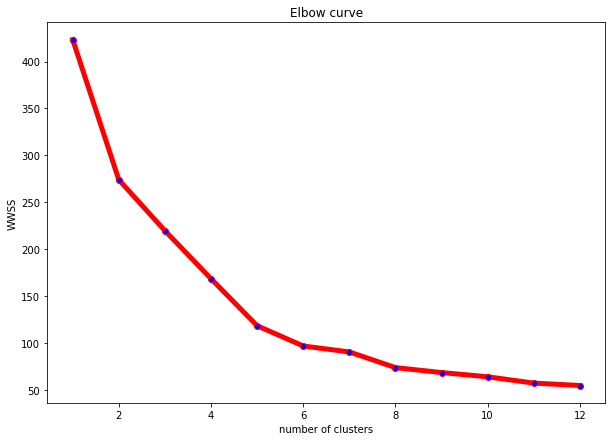

In [38]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(1,len(bestkjp)+1),bestkjp,marker='o',markerfacecolor='blue',lw=5,color='red')
plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('WWSS')
plt.show()

In [39]:
bestkna=[]
for i in range(1,13):
    k=KMeans(n_clusters=i)
    k.fit(xna_train)
    bestkna.append(k.inertia_)

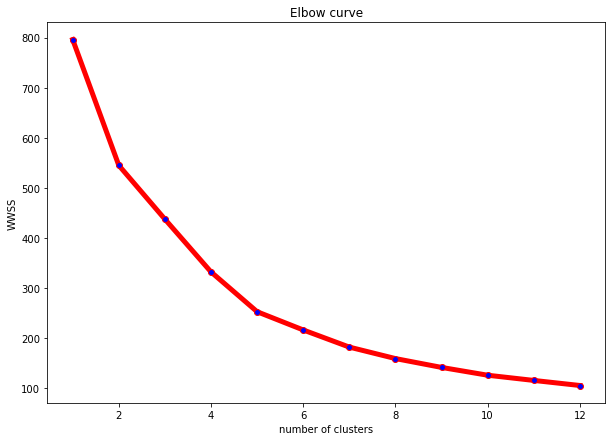

In [40]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(1,len(bestkna)+1),bestkna,marker='o',markerfacecolor='blue',lw=5,color='red')
plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('WWSS')
plt.show()

In [41]:
bestkeu=[]
for i in range(1,13):
    k=KMeans(n_clusters=i)
    k.fit(xeu_train)
    bestkeu.append(k.inertia_)

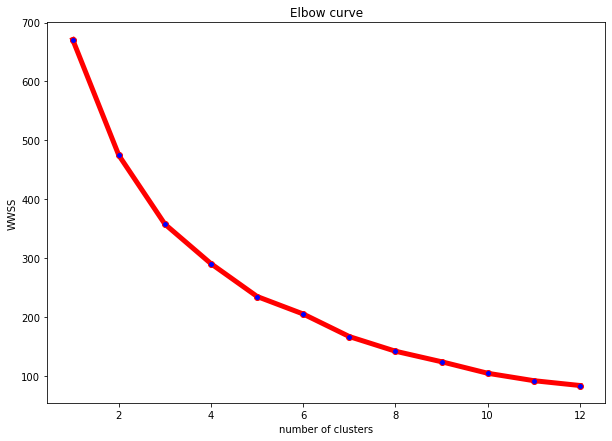

In [42]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(1,len(bestkeu)+1),bestkeu,marker='o',markerfacecolor='blue',lw=5,color='red')
plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('WWSS')
plt.show()

In [44]:
kjp=KMeans(n_clusters=5)
kjppred=k.fit_predict(xjp_train)
kna=KMeans(n_clusters=5)
knapred=k.fit_predict(xna_train)
keu=KMeans(n_clusters=6)
keupred=k.fit_predict(xeu_train)

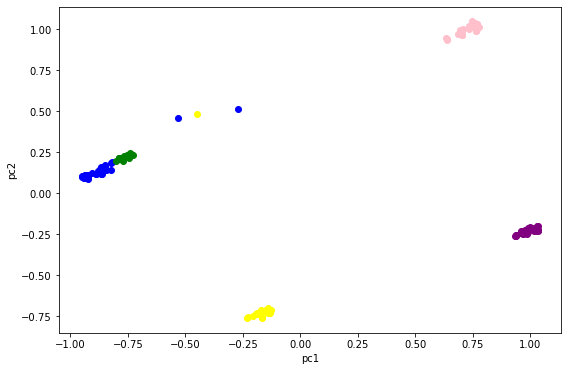

In [45]:
plt.figure(figsize=(9,6))
color=['purple','blue','green','pink','yellow','orange']
for i in range(5):
    plt.scatter(ptrainjp[kjppred==i][:,0],ptrainjp[kjppred==i][:,1],c=color[i])
    plt.xlabel('pc1')
    plt.ylabel('pc2')

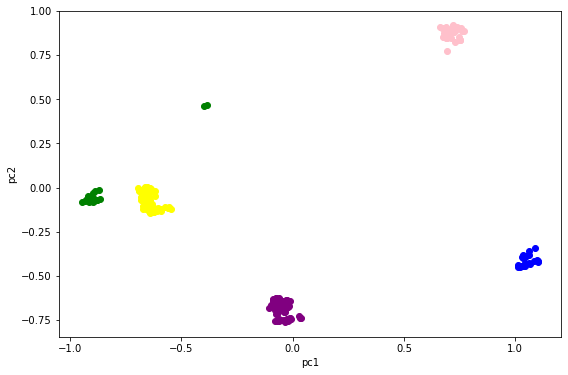

In [46]:
plt.figure(figsize=(9,6))
color=['purple','blue','green','pink','yellow','orange']
for i in range(5):
    plt.scatter(ptrainna[knapred==i][:,0],ptrainna[knapred==i][:,1],c=color[i])
    plt.xlabel('pc1')
    plt.ylabel('pc2')

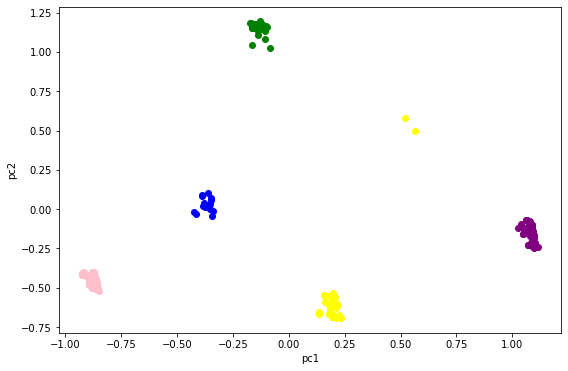

In [47]:
plt.figure(figsize=(9,6))
color=['purple','blue','green','pink','yellow','orange']
for i in range(5):
    plt.scatter(ptraineu[keupred==i][:,0],ptraineu[keupred==i][:,1],c=color[i])
    plt.xlabel('pc1')
    plt.ylabel('pc2')

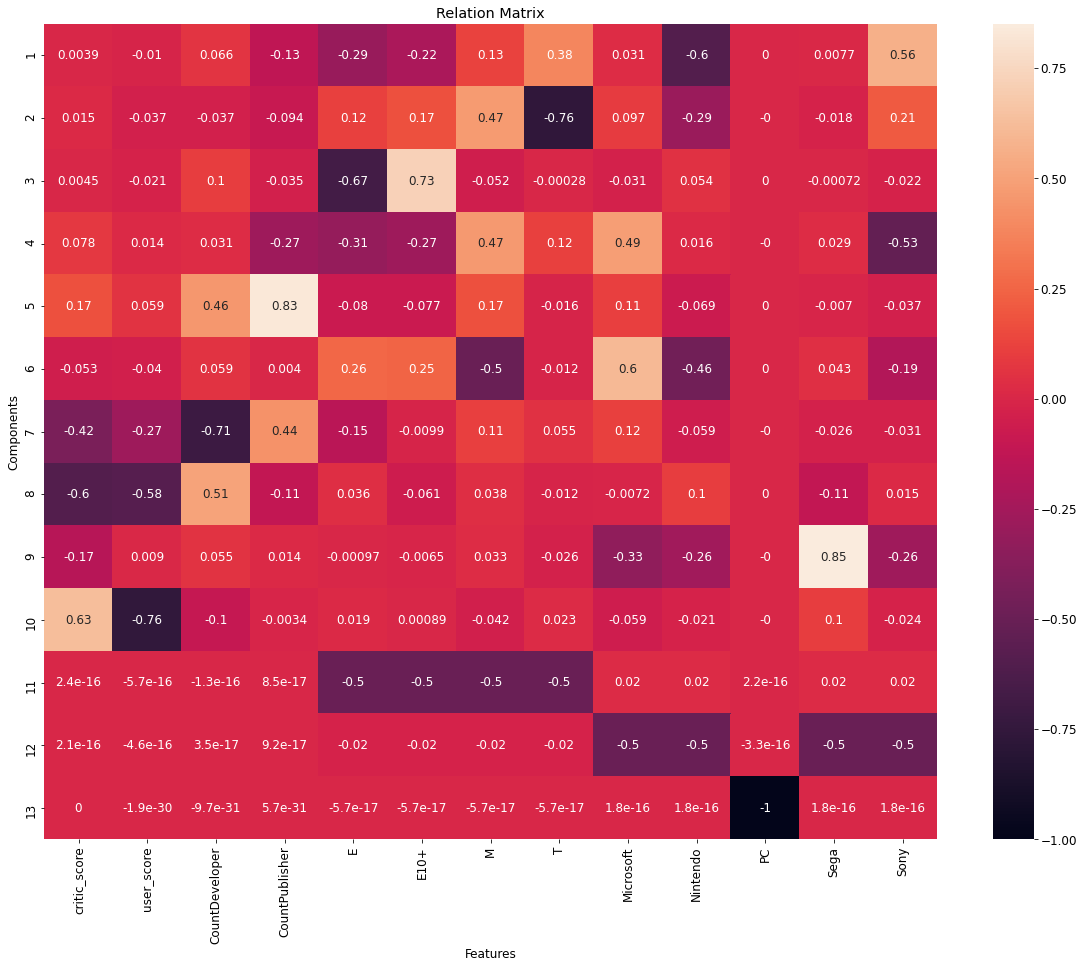

In [48]:
matplotlib.rcParams.update({'font.size': 12})
pca=PCA(n_components=None)
pca.fit(xjp_train)
plt.figure(figsize=(20,15))
sns.heatmap(pca.components_,annot=True,xticklabels=jp.drop('jp_sales',axis=1).columns,yticklabels=[str(i) for i in range(1,len(jp.columns))])
plt.xlabel('Features')
plt.ylabel('Components')
plt.title('Relation Matrix')
plt.show()
matplotlib.rcParams.update({'font.size': 10})

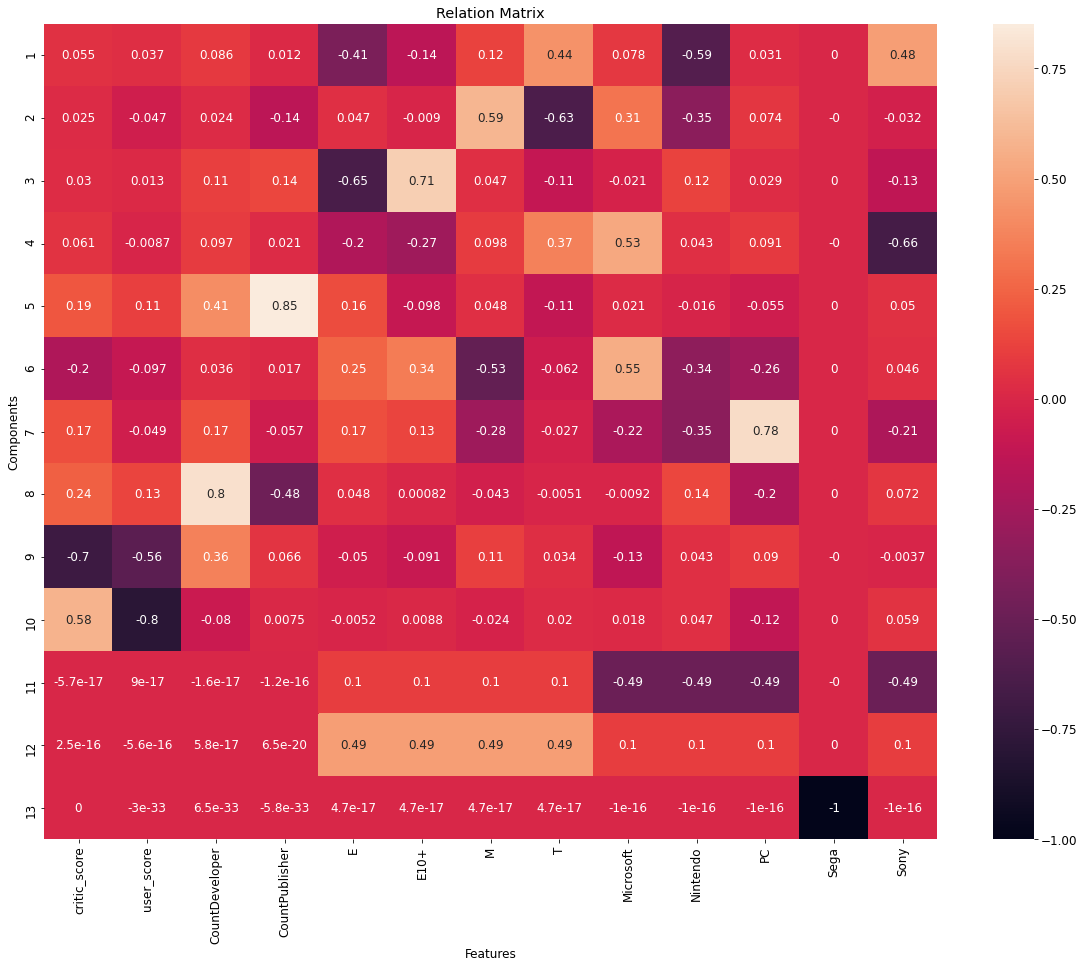

In [49]:
matplotlib.rcParams.update({'font.size': 12})
pca=PCA(n_components=None)
pca.fit(xna_train)
plt.figure(figsize=(20,15))
sns.heatmap(pca.components_,annot=True,xticklabels=na.drop('na_sales',axis=1).columns,yticklabels=[str(i) for i in range(1,len(na.columns))])
plt.xlabel('Features')
plt.ylabel('Components')
plt.title('Relation Matrix')
plt.show()
matplotlib.rcParams.update({'font.size': 10})

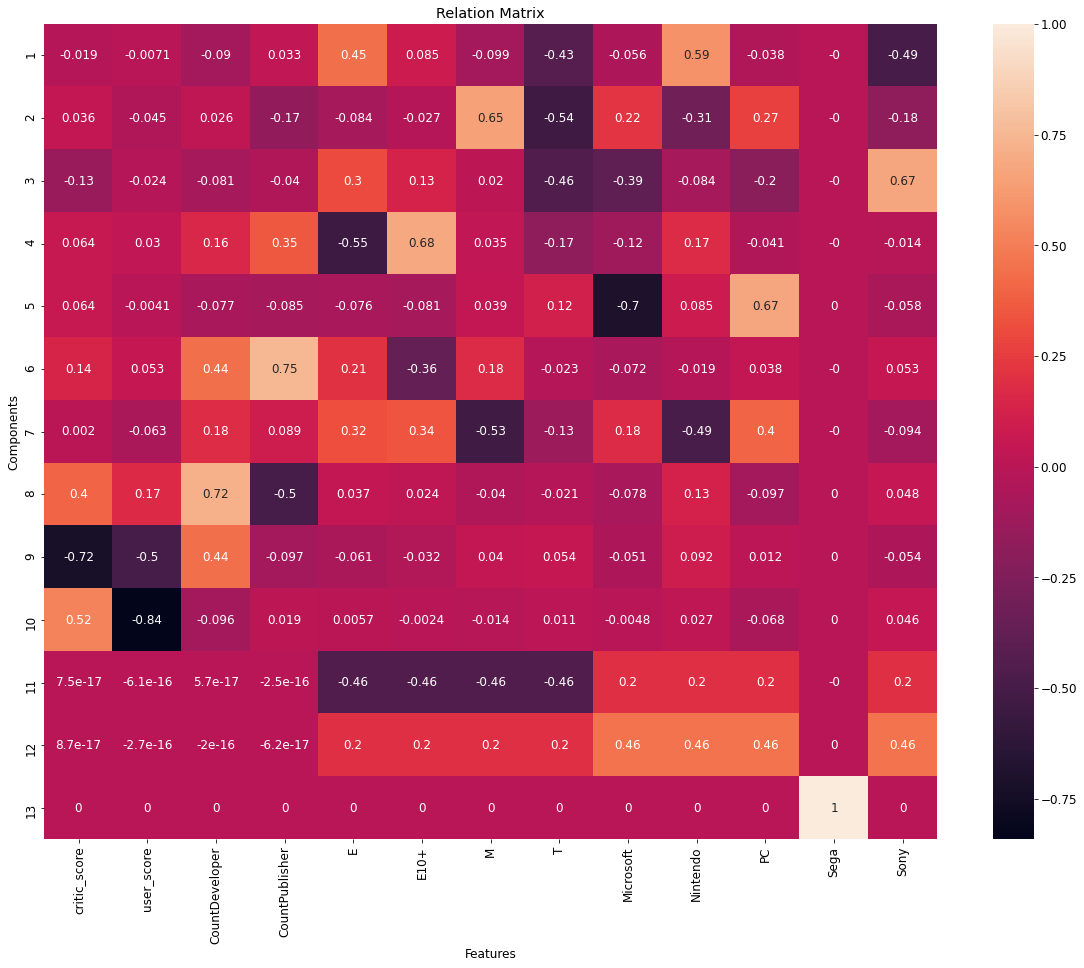

In [50]:
matplotlib.rcParams.update({'font.size': 12})
pca=PCA(n_components=None)
pca.fit(xeu_train)
plt.figure(figsize=(20,15))
sns.heatmap(pca.components_,annot=True,xticklabels=eu.drop('eu_sales',axis=1).columns,yticklabels=[str(i) for i in range(1,len(eu.columns))])
plt.xlabel('Features')
plt.ylabel('Components')
plt.title('Relation Matrix')
plt.show()
matplotlib.rcParams.update({'font.size': 10})

C:\Users\ysabe\anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ysabe\anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

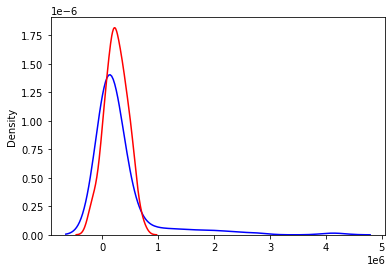

In [51]:
yhatjp_lm = lm.predict(xjp_test)
ax1 = sns.distplot(yjp_test, hist= False, color='b', label = "Actual Value")
sns.distplot(yhatjp_lm, hist=False, color = "r", label ="Predict price by Simple Linear Regression", ax=ax1)

C:\Users\ysabe\anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ysabe\anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

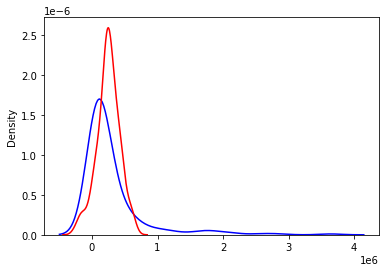

In [52]:
yhatna_lm = lm.predict(xna_test)
ax1 = sns.distplot(yna_test, hist= False, color='b', label = "Actual Value")
sns.distplot(yhatna_lm, hist=False, color = "r", label ="Predict price by Simple Linear Regression", ax=ax1)

C:\Users\ysabe\anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ysabe\anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

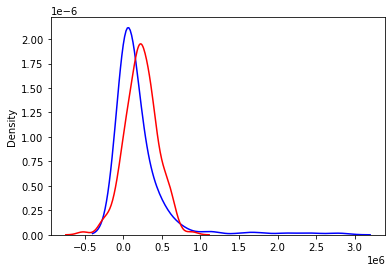

In [53]:
yhateu_lm = lm.predict(xeu_test)
ax1 = sns.distplot(yeu_test, hist= False, color='b', label = "Actual Value")
sns.distplot(yhateu_lm, hist=False, color = "r", label ="Predict price by Simple Linear Regression", ax=ax1)

In [54]:
print('MSE for SLR is: ', mean_squared_error(yjp_test, yhatjp_lm))
print('R score for SLR is: ', lm.score(xjp_test, yjp_test))

MSE for SLR is:  344341549192.96625
R score for SLR is:  -0.036563971210312296


In [55]:
print('MSE for SLR is: ', mean_squared_error(yna_test, yhatna_lm))
print('R score for SLR is: ', lm.score(xna_test, yna_test))

MSE for SLR is:  219290784306.3635
R score for SLR is:  0.11306050430522774


In [56]:
print('MSE for SLR is: ', mean_squared_error(yeu_test, yhateu_lm))
print('R score for SLR is: ', lm.score(xeu_test, yeu_test))

MSE for SLR is:  135042049790.37828
R score for SLR is:  0.09226427226301548


In [57]:
Rsqujp_test = [] ## create empty list
order =[1,2,3,4]    ## contains different polynomial orders
for n in order:
	pr = PolynomialFeatures(degree = n)
	xjp_train_pr =pr.fit_transform(xjp_train)
	xjp_test_pr = pr.fit_transform(xjp_test)
	lm.fit(xjp_train_pr, yjp_train)
	Rsqujp_test.append(lm.score(xjp_test_pr, yjp_test))
print('R square score for different polynomial orders are: ',Rsqujp_test)

R square score for different polynomial orders are:  [0.044850434999819555, -0.03498233336273926, -8.102053379614948e+18, -1.2551541266761715e+18]


In [58]:
Rsquna_test = [] ## create empty list
order =[1,2,3,4]    ## contains different polynomial orders
for n in order:
	pr = PolynomialFeatures(degree = n)
	xna_train_pr =pr.fit_transform(xna_train)
	xna_test_pr = pr.fit_transform(xna_test)
	lm.fit(xna_train_pr, yna_train)
	Rsquna_test.append(lm.score(xna_test_pr, yna_test))
print('R square score for different polynomial orders are: ',Rsquna_test)

R square score for different polynomial orders are:  [0.14744023589975475, -0.9327804653504839, -2.3760471577506734e+18, -4.367393556269182e+17]


In [100]:
Rsqueu_test = [] ## create empty list
order =[1,2,3,4]    ## contains different polynomial orders
for n in order:
	pr = PolynomialFeatures(degree = n)
	xeu_train_pr =pr.fit_transform(xeu_train)
	xeu_test_pr = pr.fit_transform(xeu_test)
	lm.fit(xeu_train_pr, yeu_train)
	Rsqueu_test.append(lm.score(xeu_test_pr, yeu_test))
print('R square score for different polynomial orders are: ',Rsqueu_test)

R square score for different polynomial orders are:  [0.09226427226301592, -3.5823187247144905e+21, -4.514766093705045e+20, -8.850611004690675e+17]


In [120]:
def regresssor_model(x,y,estimator):
   
    regressor=estimator()
    regressor.fit(x,y)
    lr_rmse=np.sqrt(mean_squared_error(y,regressor.predict(x)))
    cv_regressor=cross_val_score(cv=10,X=x,y=y,estimator=regressor,scoring='r2')
    print('The cross validated accuracy  - '+str(100*cv_regressor.mean()))
    print('The corss validated variance is - '+str(100*cv_regressor.std()))
    print (regressor.coef_)
    return regressor

In [125]:
def topoly(degree,x_train,x_test):
    poly=PolynomialFeatures(degree=degree)
    X=poly.fit_transform(x_train)
    x=poly.fit_transform(x_test)
    return (X,x)

In [126]:
def evaluate(ypred,ytest,regressor):
    plt.figure(figsize=(15,8))
    plt.xlabel('(ytest) - (ypred)')
    plt.ylabel('frequency')
    plt.title('residual plot')
    plt.hist(ytest-ypred)
    print("root mean squared error for test data   is "+str(np.sqrt(mean_squared_error(ytest,ypred))))
    plt.show()

The cross validated accuracy  - -16.0212065089868
The corss validated variance is - 65.8864843737832
[     0.         433448.5441795  277592.26633435  90644.71092453
 409950.29951947  39742.53621806  37352.32155067 -51015.36720955
 -26079.49055917 -62343.83095726  76663.1148874       0.
 -73767.96657171  59448.68264156]
root mean squared error for test data   is 563290.401412379


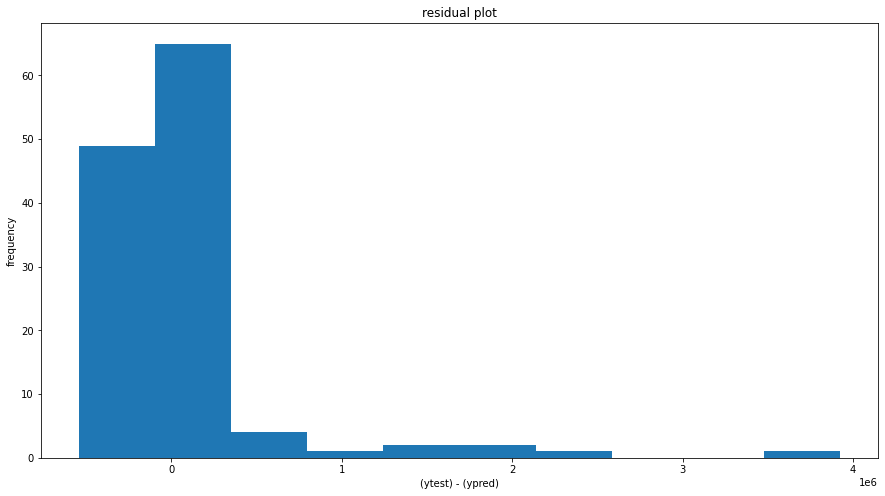

In [127]:
xjptrainpoly,xjptestpoly=topoly(1,xjp_train,xjp_test)
l=regresssor_model(xjptrainpoly,yjp_train,LinearRegression)
evaluate(l.predict(xjptestpoly),yjp_test,l)

The cross validated accuracy  - 15.941591753339033
The corss validated variance is - 22.425510143156973
[      0.         1341576.17613497 -281526.91651659  -26765.33993708
  105328.05366823   26701.83826547  -64697.43291746  148192.17200224
 -110196.57735026  298958.84187823  -59321.47588108 -197599.9085609
       0.          -42037.45743624]
root mean squared error for test data   is 459119.36325250147


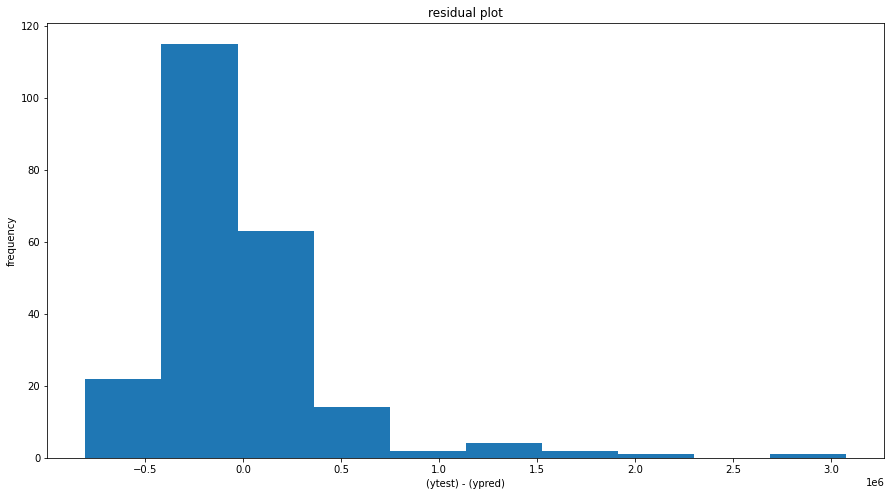

In [128]:
xnatrainpoly,xnatestpoly=topoly(1,xna_train,xna_test)
l=regresssor_model(xnatrainpoly,yna_train,LinearRegression)
evaluate(l.predict(xnatestpoly),yna_test,l)

The cross validated accuracy  - -21.431483067489935
The corss validated variance is - 73.8554914128844
[      0.         1100772.92253399 -695919.40730586    4433.56853159
   74223.06057704   64253.13302558  -62296.96711471   69636.30564641
  -71592.47155728   20538.39761737  -49910.93951211  -22368.73621557
       0.           51741.27811031]
root mean squared error for test data   is 367480.6794790418


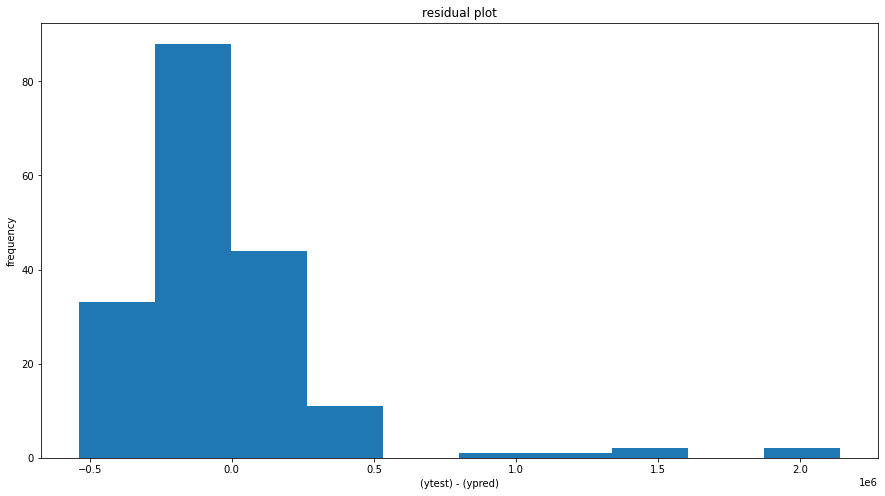

In [129]:
xeutrainpoly,xeutestpoly=topoly(1,xeu_train,xeu_test)
l=regresssor_model(xeutrainpoly,yeu_train,LinearRegression)
evaluate(l.predict(xeutestpoly),yeu_test,l)

The cross validated accuracy  - -13.9661233189669
The corss validated variance is - 61.58791437303746
root mean squared error for test data   is 563390.5074656238


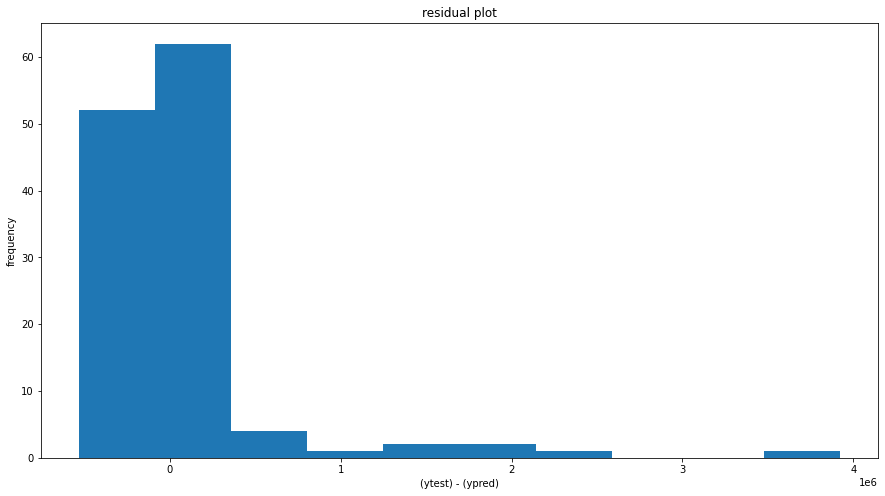

Text(0.5, 1.0, 'coeff graph')

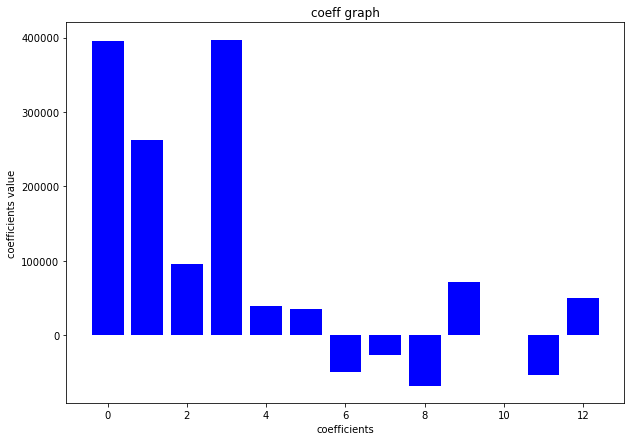

In [69]:

check =regresssor_model(xjp_train,yjp_train,Ridge)
evaluate(check.predict(xjp_test),yjp_test,check)
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(check.coef_)),check.coef_,color='blue')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

MSE for RidgeModel is:  317297244215.16864
R score for RidgeModel is:  0.044846919320063905


C:\Users\ysabe\anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ysabe\anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

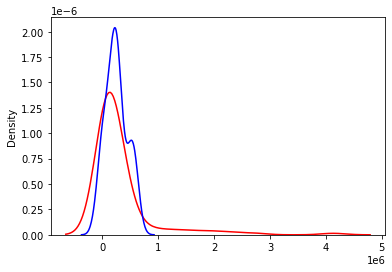

In [70]:
RidgeModeljp = Ridge(alpha = 0.01)
RidgeModeljp.fit(xjp_train,yjp_train)
yhatjp_ridge = RidgeModeljp.predict(xjp_test)


print('MSE for RidgeModel is: ', mean_squared_error(yjp_test, yhatjp_ridge))
print('R score for RidgeModel is: ', RidgeModeljp.score(xjp_test, yjp_test))

### predict by using x_test
ax2 = sns.distplot(yjp_test, hist= False, color='r', label = "Actual Value")
sns.distplot(yhatjp_ridge, hist=False, color = "b", label ="Predict price by RidgeModel", ax=ax2)

The cross validated accuracy  - 16.43727504319805
The corss validated variance is - 19.963077433072097
root mean squared error for test data   is 457239.532246973


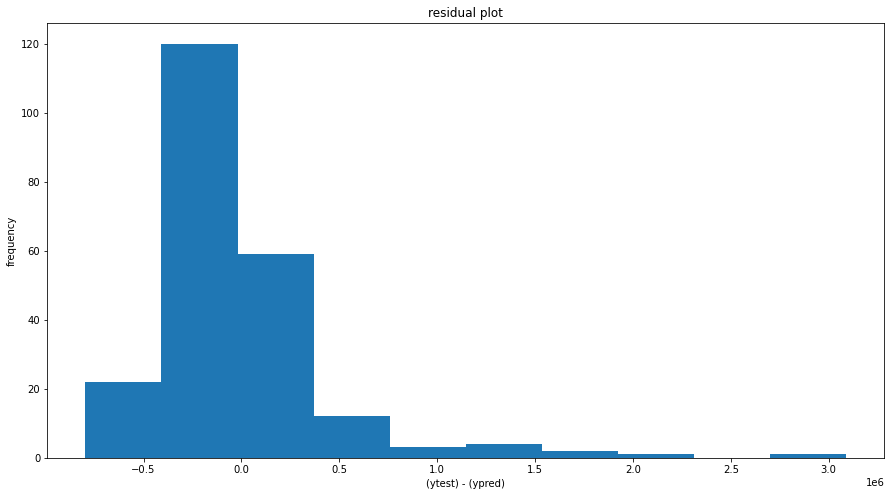

Text(0.5, 1.0, 'coeff graph')

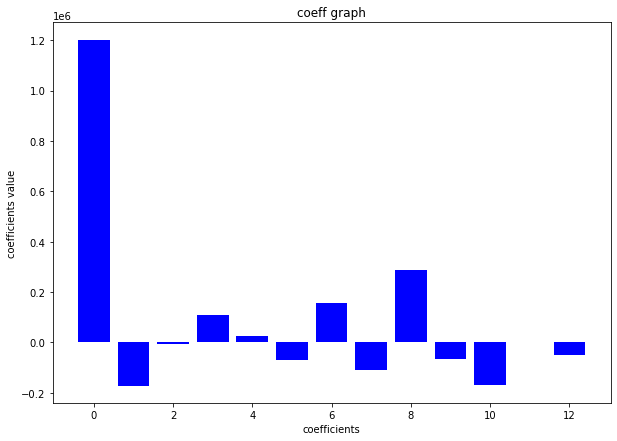

In [71]:

check =regresssor_model(xna_train,yna_train,Ridge)
evaluate(check.predict(xna_test),yna_test,check)
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(check.coef_)),check.coef_,color='blue')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

MSE for RidgeModel is:  210766378027.1372
R score for RidgeModel is:  0.1475381620431453


C:\Users\ysabe\anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ysabe\anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

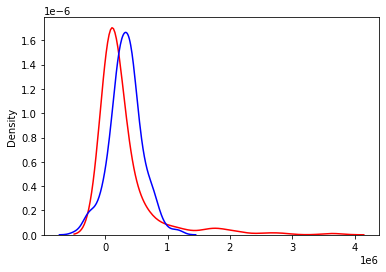

In [72]:
RidgeModelna = Ridge(alpha = 0.01)
RidgeModelna.fit(xna_train,yna_train)
yhatna_ridge = RidgeModelna.predict(xna_test)


print('MSE for RidgeModel is: ', mean_squared_error(yna_test, yhatna_ridge))
print('R score for RidgeModel is: ', RidgeModelna.score(xna_test, yna_test))

### predict by using x_test
ax2 = sns.distplot(yna_test, hist= False, color='r', label = "Actual Value")
sns.distplot(yhatna_ridge, hist=False, color = "b", label ="Predict price by RidgeModel", ax=ax2)

The cross validated accuracy  - -14.902685774774232
The corss validated variance is - 64.305773227872
root mean squared error for test data   is 362012.10990435106


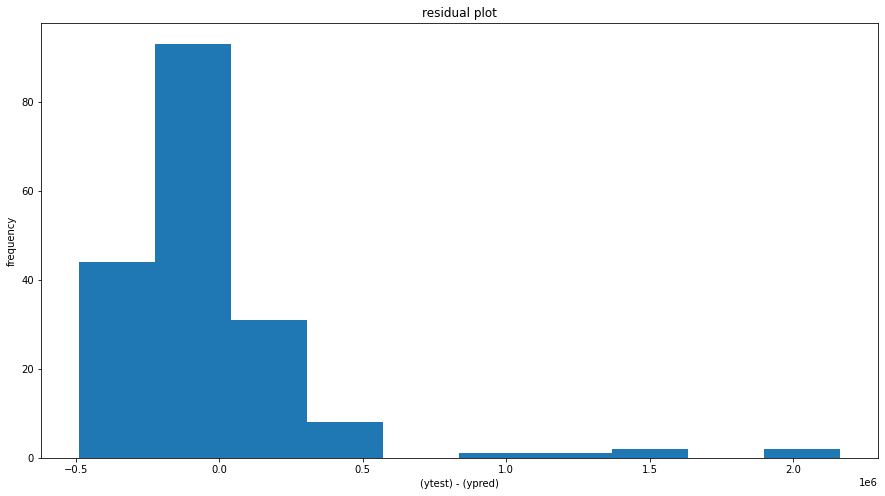

Text(0.5, 1.0, 'coeff graph')

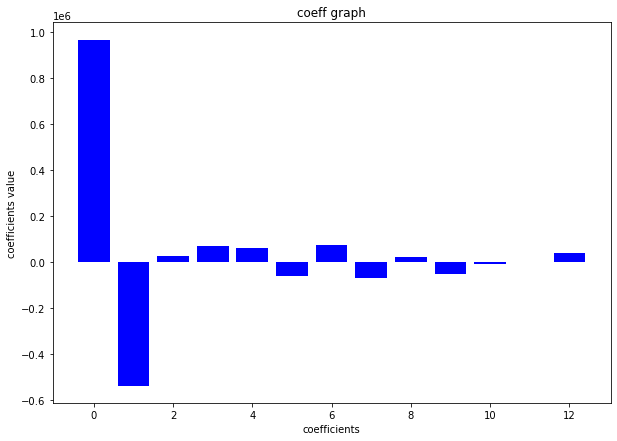

In [73]:

check =regresssor_model(xeu_train,yeu_train,Ridge)
evaluate(check.predict(xeu_test),yeu_test,check)
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(check.coef_)),check.coef_,color='blue')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

MSE for RidgeModel is:  134986977206.14629
R score for RidgeModel is:  0.09263446326947444


C:\Users\ysabe\anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ysabe\anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

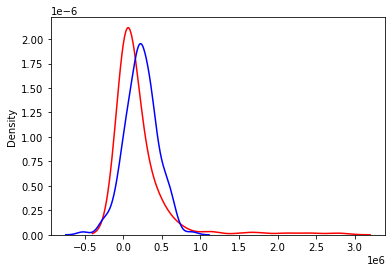

In [74]:
RidgeModeleu = Ridge(alpha = 0.01)
RidgeModeleu.fit(xeu_train,yeu_train)
yhateu_ridge = RidgeModeleu.predict(xeu_test)


print('MSE for RidgeModel is: ', mean_squared_error(yeu_test, yhateu_ridge))
print('R score for RidgeModel is: ', RidgeModeleu.score(xeu_test, yeu_test))

### predict by using x_test
ax2 = sns.distplot(yeu_test, hist= False, color='r', label = "Actual Value")
sns.distplot(yhateu_ridge, hist=False, color = "b", label ="Predict price by RidgeModel", ax=ax2)

In [75]:
dtreejp=regresssor_model(xjp_train,yjp_train,DecisionTreeRegressor)
dtreejp.fit(xjp_train,yjp_train)
print('mean squared errror is',end='\t-')
np.sqrt(mean_squared_error(yjp_test,dtreejp.predict(xjp_test)))

The cross validated accuracy  - -382.5425815613932
The corss validated variance is - 732.7765284270021
mean squared errror is	-

849505.7386504225

In [76]:
par=[{
            
            'max_depth':[2,3,4,5,6,10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,7,10,12],
            'min_samples_leaf' :[1,3,5,10,15,20,25],
            'max_features':['sqrt','log2'],
            
        }
        ]

from sklearn.model_selection import GridSearchCV
gc=GridSearchCV(dtreejp,par,cv=10,scoring='r2',n_jobs=-1)
gc.fit(xjp_train,yjp_train)
gc.best_estimator_

DecisionTreeRegressor(max_depth=3, max_features='log2', min_samples_leaf=25,
                      min_samples_split=12)

In [77]:
dtjp=gc.best_estimator_
dtjp.fit(xjp_train,yjp_train)
np.sqrt(mean_squared_error(yjp_test,dtreejp.predict(xjp_test)))

849505.7386504225

Text(0.5, 1.0, 'feature importance')

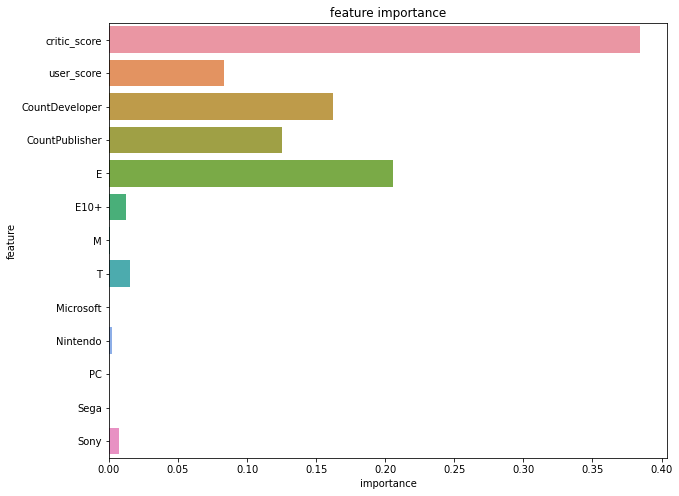

In [78]:
plt.figure(figsize=(10,8))
datajp=pd.DataFrame({'feature':jp.columns[jp.columns!='jp_sales'].values,"importance":dtreejp.feature_importances_})
sns.barplot(data=datajp,y='feature',x='importance')
plt.title('feature importance')

In [79]:
dtreena=regresssor_model(xna_train,yna_train,DecisionTreeRegressor)
dtreena.fit(xna_train,yna_train)
print('mean squared errror is',end='\t-')
np.sqrt(mean_squared_error(yna_test,dtreena.predict(xna_test)))

The cross validated accuracy  - -55.03785619591126
The corss validated variance is - 46.8309765839636
mean squared errror is	-

508960.93429544166

In [80]:
par=[{
            
            'max_depth':[2,3,4,5,6,10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,7,10,12],
            'min_samples_leaf' :[1,3,5,10,15,20,25],
            'max_features':['sqrt','log2'],
            
        }
        ]

from sklearn.model_selection import GridSearchCV
gc=GridSearchCV(dtreena,par,cv=10,scoring='r2',n_jobs=-1)
gc.fit(xna_train,yna_train)
gc.best_estimator_

DecisionTreeRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=4)

In [81]:
gc.best_score_
dtna=gc.best_estimator_
dtna.fit(xna_train,yna_train)
np.sqrt(mean_squared_error(yna_test,dtreena.predict(xna_test)))

508960.93429544166

Text(0.5, 1.0, 'feature importance')

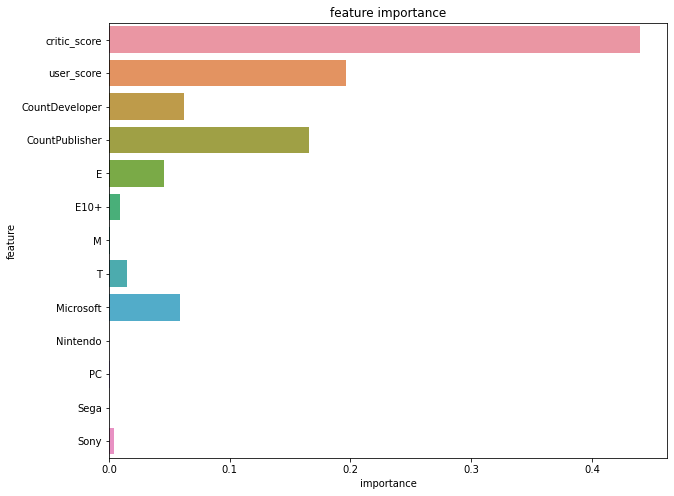

In [82]:
plt.figure(figsize=(10,8))
datana=pd.DataFrame({'feature':na.columns[na.columns!='na_sales'].values,"importance":dtreena.feature_importances_})
sns.barplot(data=datana,y='feature',x='importance')
plt.title('feature importance')

In [83]:
dtreeeu=regresssor_model(xeu_train,yeu_train,DecisionTreeRegressor)
dtreeeu.fit(xeu_train,yeu_train)
print('mean squared errror is',end='\t-')
np.sqrt(mean_squared_error(yeu_test,dtreeeu.predict(xeu_test)))

The cross validated accuracy  - -710.2417992279111
The corss validated variance is - 1020.5348909234335
mean squared errror is	-

447273.7932786205

In [84]:
par=[{
            
            'max_depth':[2,3,4,5,6,10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,7,10,12],
            'min_samples_leaf' :[1,3,5,10,15,20,25],
            'max_features':['sqrt','log2'],
            
        }
        ]

from sklearn.model_selection import GridSearchCV
gc=GridSearchCV(dtreeeu,par,cv=10,scoring='r2',n_jobs=-1)
gc.fit(xeu_train,yeu_train)
gc.best_estimator_

DecisionTreeRegressor(max_depth=4, max_features='log2', min_samples_leaf=3,
                      min_samples_split=4)

Text(0.5, 1.0, 'feature importance')

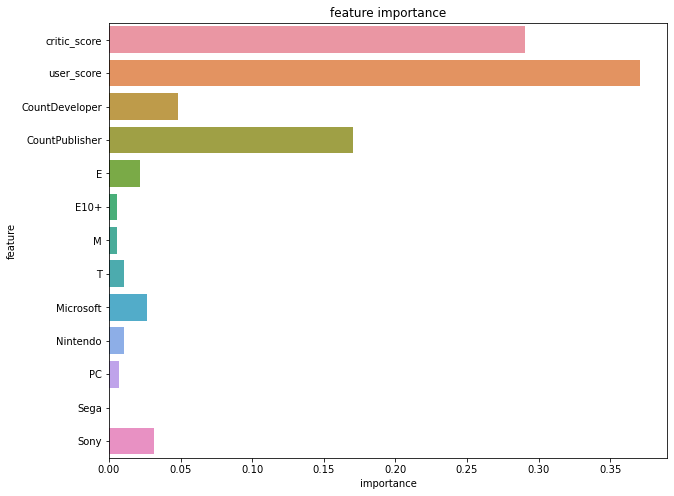

In [85]:
plt.figure(figsize=(10,8))
dataeu=pd.DataFrame({'feature':eu.columns[eu.columns!='eu_sales'].values,"importance":dtreeeu.feature_importances_})
sns.barplot(data=dataeu,y='feature',x='importance')
plt.title('feature importance')

In [86]:
rg=RandomForestRegressor(n_estimators=50)
rg.fit(xjp_train,yjp_train)

print(np.sqrt(mean_squared_error(yjp_test,rg.predict(xjp_test))))
print(rg.score(xjp_test,yjp_test))

607703.5814323368
-0.11170682582223823


In [87]:
rg=RandomForestRegressor(n_estimators=50)
rg.fit(xna_train,yna_train)

print(np.sqrt(mean_squared_error(yna_test,rg.predict(xna_test))))
print(rg.score(xna_test,yna_test))

421847.3968817544
0.28024554642861077


In [88]:
rg=RandomForestRegressor(n_estimators=50)
rg.fit(xeu_train,yeu_train)

print(np.sqrt(mean_squared_error(yeu_test,rg.predict(xeu_test))))
print(rg.score(xeu_test,yeu_test))

377163.51621033746
0.04379775361625238


In [89]:

params=[{
            'n_estimators':[20,30,70,50,100,200,300,400,600,650,630,680],
            'max_depth':[10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,5,10],
            'min_samples_leaf' :[1,2,5,7,10],
            'bootstrap':[True,False],
            'max_features':['sqrt','auto']
            
            
        }
]

In [90]:
rg=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=70,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=630, n_jobs=1,
           oob_score=False, verbose=0, warm_start=False)
rg.fit(xjp_train,yjp_train)
np.sqrt(mean_squared_error(yjp_test,rg.predict(xjp_test)))

574375.0846355682

In [91]:
rg.score(xjp_test,yjp_test)

0.006888831404661899

<AxesSubplot:title={'center':'Feature Importance'}>

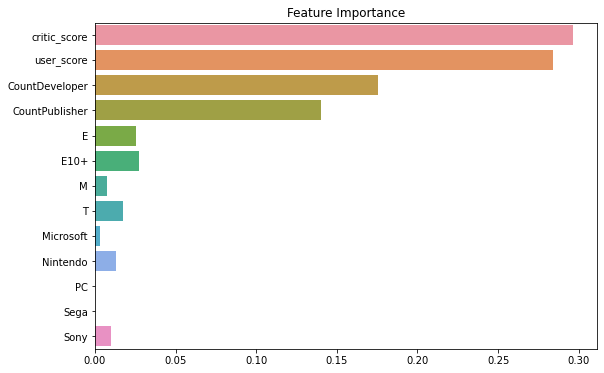

In [92]:
plt.figure(figsize=(9,6))
plt.title('Feature Importance')

sns.barplot(data={'importance':rg.feature_importances_,'feature':jp.columns[jp.columns!='jp_sales']},y='feature',x='importance')

In [93]:
rg=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=70,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=630, n_jobs=1,
           oob_score=False, verbose=0, warm_start=False)
rg.fit(xna_train,yna_train)
np.sqrt(mean_squared_error(yna_test,rg.predict(xna_test)))

416220.8385700529

In [94]:
rg.score(xna_test,yna_test)

0.29931752798876554

<AxesSubplot:title={'center':'Feature Importance'}>

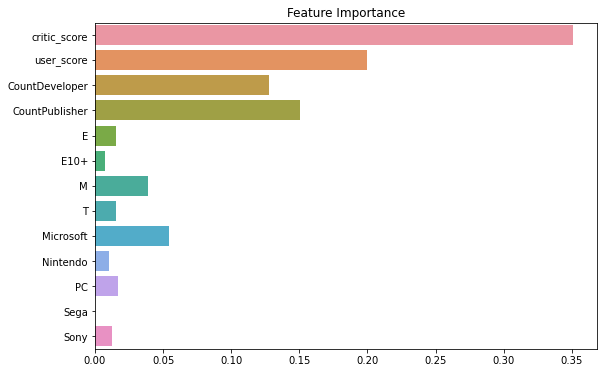

In [95]:
plt.figure(figsize=(9,6))
plt.title('Feature Importance')

sns.barplot(data={'importance':rg.feature_importances_,'feature':na.columns[na.columns!='na_sales']},y='feature',x='importance')

In [96]:
rg=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=70,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=630, n_jobs=1,
           oob_score=False, verbose=0, warm_start=False)
rg.fit(xeu_train,yeu_train)
np.sqrt(mean_squared_error(yeu_test,rg.predict(xeu_test)))

374881.0163830313

In [97]:
rg.score(xeu_test,yeu_test)

0.055336130473148226

<AxesSubplot:title={'center':'Feature Importance'}>

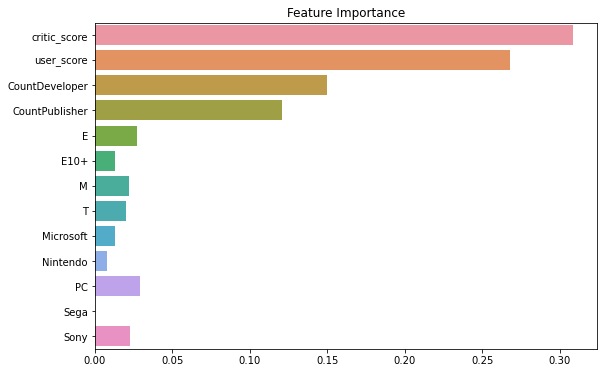

In [98]:
plt.figure(figsize=(9,6))
plt.title('Feature Importance')

sns.barplot(data={'importance':rg.feature_importances_,'feature':eu.columns[eu.columns!='eu_sales']},y='feature',x='importance')